In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import bilby
import scrinet
import os 

from scrinet.analysis import matchedfilter_batch as mf
from scrinet.analysis import frequencyseries_batch as fs
from scrinet.analysis import utils as ut

from scrinet.workflow.pipe_utils import (
    init_logger,
    load_data,
    match,
    
    wave_sur_many,
    load_model,
)

import tensorflow as tf
import scrinet.sample.sample_helpers as nn_help


In [4]:
rootdir = '/Users/Rhys/Documents/PhD/PE/NN_for_PE/3D_NP'
# rootdir = '/Users/spx8sk/work/data/scrinet/3D_NP'

In [5]:
amp_basis = os.path.join(rootdir, "rb/amp/amp_eim_basis.npy")
amp_model_dir = os.path.join(rootdir, "ts/amp/fits")

phase_basis = os.path.join(rootdir, "rb/phase/phase_eim_basis.npy")
phase_model_dir = os.path.join(rootdir, "ts/phase/fits")

In [6]:
amp_model, amp_basis = load_model(
    basis_file=amp_basis,
    nn_weights_file=os.path.join(amp_model_dir, "best.h5"),
    X_scalers_file=os.path.join(amp_model_dir, "X_scalers.npy"),
    Y_scalers_file=os.path.join(amp_model_dir, "Y_scalers.npy"),
)

phase_model, phase_basis = load_model(
    basis_file=phase_basis,
    nn_weights_file=os.path.join(phase_model_dir, "best.h5"),
    X_scalers_file=os.path.join(phase_model_dir, "X_scalers.npy"),
    Y_scalers_file=os.path.join(phase_model_dir, "Y_scalers.npy"),
)

In [7]:
amp_basis = tf.convert_to_tensor(amp_basis, dtype = tf.float32)
phase_basis = tf.convert_to_tensor(phase_basis, dtype = tf.float32)

In [8]:
true_q = tf.constant([3., 0.8, 0.5], shape=(1, 3))

In [9]:
true_q = tf.convert_to_tensor(true_q)
true_q = tf.cast(true_q, tf.float32)

In [10]:
sur_hp, sur_hc, _, _ = nn_help.generate_surrogate(
    true_q,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis,
)

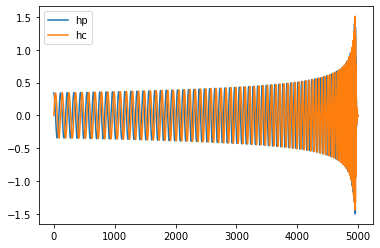

In [11]:
plt.plot(sur_hp.numpy().flatten(), label = 'hp')
plt.plot(sur_hc.numpy().flatten(), label = 'hc')
plt.legend()

In [12]:
sur_hp = sur_hp.numpy()
sur_hc = sur_hc.numpy()

In [13]:
import time
from scrinet.analysis import utils as ut

In [23]:
t = time.time()

In [41]:
params = tf.constant([[3., 0.8, 0.5, 1., 1., t, 1., 0.],
                      [3., 0.8, 0.5, 0.5, 0.5, t, 1., np.pi/2]], dtype = tf.float64, shape=(2,8))

params = tf.convert_to_tensor(params)

In [42]:
wvfs = ut.tf_generate_surrogate_at_detector(params, amp_model=amp_model,
                                  amp_basis=amp_basis,
                                  phase_model=phase_model,
                                  phase_basis=phase_basis, 
                                  detector= 'H1')

In [43]:
# H1.detector_tensor.shape

(4000, 5200)

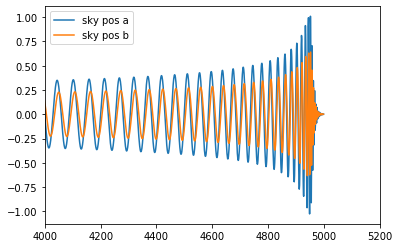

In [44]:
plt.plot(wvfs[0], label = 'sky pos a')
plt.plot(wvfs[1], label = 'sky pos b')
plt.legend()
plt.xlim(4000, 5200)

In [85]:
tf.einsum?